# DSCI 100 Individual Project Plan by Jiangche Xiong

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## 1. Data Discription

### 1.1 Summary for `players.csv`

General information
- Number of observations: 196

- Number of variables: 7

- Purpose: Contains player profile and activity data.


| Variable Name | Type | Description |
|----------------|------|--------------|
| experience | chr | Player experience level  |
| hashedEmail | chr | Unique identifier (hashed email) for linking datasets |
| name | chr | Player name |
| gender | chr | Player gender identity |
| subscribe | lgl  | Whether the player has an active subscription |
| played_hours | dbl | Total number of hours played | 
| Age | dbl | Player age | 

### 1.2 Summary for `sessions.csv`

General information
- Number of observations: 1,535

- Number of variables: 5

- Purpose: Records game session information per player.


| Variable Name | Type | Description 
|----------------|------|-------------
| hashedEmail | chr | Player identifier | 
| start_time | chr | Session start time | 
| end_time | chr | Session end time | 
| original_start_time | dbl | System-recorded session start|
| original_end_time | dbl | System-recorded session end|

### 1.3 Potential issues

- Missing Data: 2 missing entries for `Age`, 2 missing `end_time` and `original_end_time` values.
- Categorical Imbalance: Most players are Male, indicate that gender may not be a good predictor
- Many players who set up an account but play 0 hours, which might not be helpful to our prediction.

## 2. General Question

Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specification：Given the `experience`, `played_hours`, `Age`, and `gender` as predictors, which one can give the most accurate prediction, i.e. smallest RMSPE, on the subscribtion? Do these relationships differ across experience levels (Amateur, Intermediate, Professional, etc.)?

## 3. Exploratory Data Analysis and Visualization

### 3.1 Load the datasets into R

In [2]:

players <- read_csv("https://raw.githubusercontent.com/Zncufeauag1/DSCI-Project-Plan/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/Zncufeauag1/DSCI-Project-Plan/refs/heads/main/sessions.csv")



Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### 3.2 Tidy the Data

In [3]:
players_tidy <- players |>
  mutate(
    experience = as.factor(experience),
    gender = as.factor(gender),
    subscribe = as.factor(subscribe))

sessions_tidy <- sessions |>
  mutate(
    start_time = dmy_hm(start_time),
    end_time = dmy_hm(end_time)
  ) 

### 3.3 Brief summary of the mean

In [4]:
played_hours <- players |>
  summarise(mean = round(mean(played_hours, na.rm = TRUE), 2))

Age <- players |>
  summarise(mean = round(mean(Age, na.rm = TRUE), 2))

| Variable Name | Type | Mean |
|----------------|------------|--------------------|
| played_hours | dbl | Mean = 5.85 |
| Age | dbl | Mean = 21.14 |

### 3.4 Visualization

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


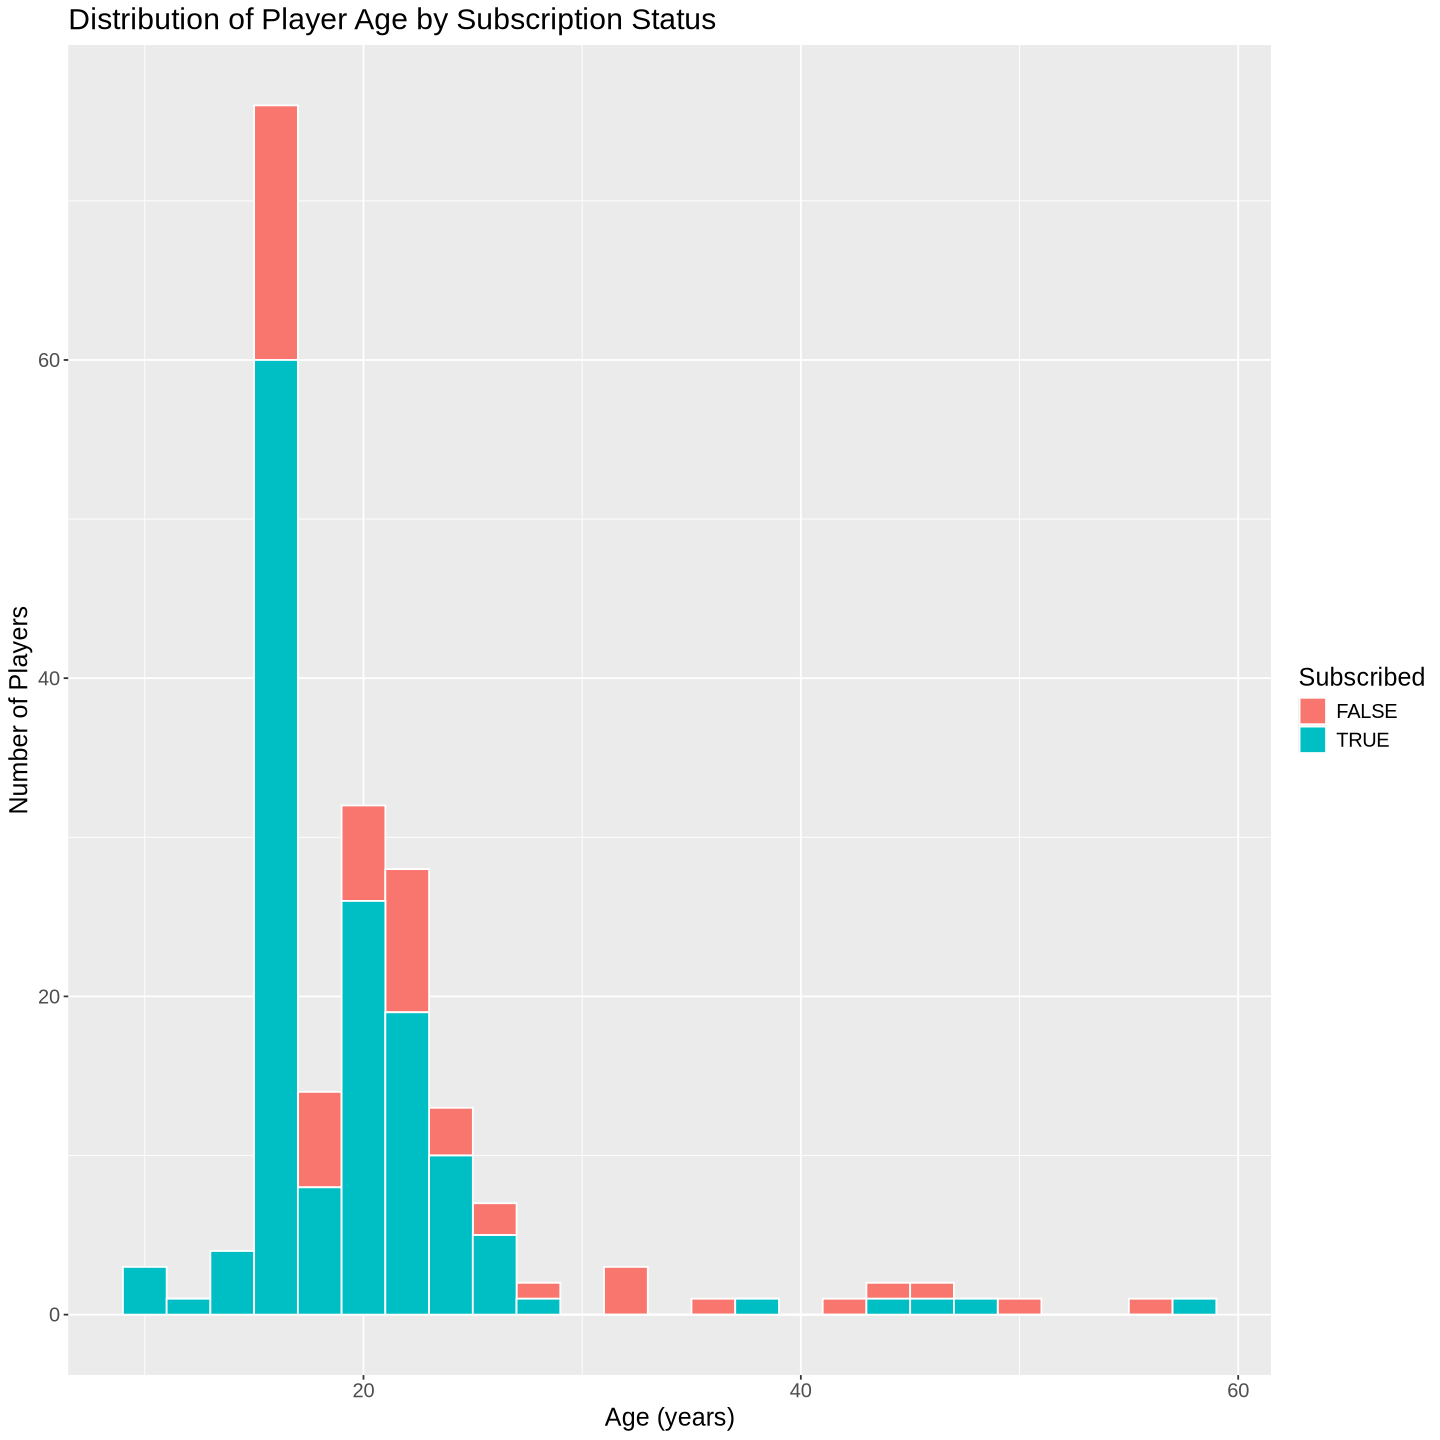

In [5]:
options(repr.plot.width = 12, repr.plot.height = 12) 

ggplot(players_tidy, aes(x = Age, fill = subscribe)) +
  geom_histogram(binwidth = 2, color = "white") +
  labs(title = "Distribution of Player Age by Subscription Status",
       x = "Age (years)",
       y = "Number of Players",
       fill = "Subscribed") +
    theme(text = element_text(size = 15))

This plot explore the age distribution of the players. It indicates that most of the players are young, typically in 10 to 30, and the majority of subscribers also fall within this age range.
This suggests that younger players are more likely to engage with and subscribe to the newsletter

## 4. Method and Plan